# Strassens Algorithmus

In [1]:
import numpy as np
import math

In diesem Notebook sollen Sie den Strassen Algorithmus für allgemeine Matrizen implementieren.


Mehr Informationen zur Matrixmultiplikation finden Sie
<a href=https://de.wikipedia.org/wiki/Matrizenmultiplikation> hier </a>.


Mehr Informationen zum Strassen Algorithmus finden Sie auf Wikipedia:
<a href=https://en.wikipedia.org/wiki/Strassen_algorithm> hier </a>.



    
Dabei gehen wir wie folgt vor:

**Schritt 1**: 
Implementierung der Standard Matrix Multiplikation


**Schritt 2**
Implementierung des Strassen Algorithmus mit einer 2x2 Matrix

**Schritt 3**
Implementierung des Strassen Algorithmus für Blockmatrizen



**Schritt 4**
Implementierung des Strassen Algorithmus mit einer $ 2^n\times 2^n$ Matrix

**Schritt 5**
Implementierung der Allgemeinen Matrixmultiplikation



    
    


## Schritt 1: Standard Matrix Multiplikation

Sei $A=\begin{pmatrix} a_{11}&\dots &a_{1k} \\ \vdots &\ddots&\vdots \\ a_{n1}&\dots & a_{nk} \end{pmatrix}\in \mathbb{R}^{n\times k}$ sowie $B=\begin{pmatrix} b_{11}&\dots &b_{1m} \\ \vdots &\ddots&\vdots \\ b_{k1}&\dots & b_{km} \end{pmatrix}\in \mathbb{R}^{k\times m}$.
Sei weiterhin $C=\begin{pmatrix} c_{11}&\dots &c_{1m} \\ \vdots &\ddots&\vdots \\ c_{n1}&\dots & c_{nm} \end{pmatrix}\in \mathbb{R}^{n\times m}$.

Dann gilt folgende Formel für die Elemente von $C$.

$c_{ij}=\sum_{s=1,\dots k}a_{is}b_{sj}$.

In [2]:
def matrix_times_matrix(A,B):
    """
    A,B are numpy arrays such that A*B is defined.
    The function returns a numpy array C which is the Matrix product of A and B
    """
    
    n,k=A.shape
    k,m=B.shape


    C=np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            for s in range(k):
                C[i,j]+=A[i,s]*B[s,j]

    return C

**Teste deine Funktion: (Code nicht verändern!!)**

In [3]:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8],[9,10]])


if np.all(matrix_times_matrix(B,A) == np.array([[23, 34],[31, 46],[39, 58]])):
    
    print("Success")
    
else:
    print("Try again")


Success


## Schritt 2: Strassenalgorithmus für $2\times 2$ Matrizen

Im zweiten Schritt implementieren Sie den Strassen Algorithmus für eine $2\times 2$ Matrix. Dafür können Sie das folgende Schaubild nutzen.

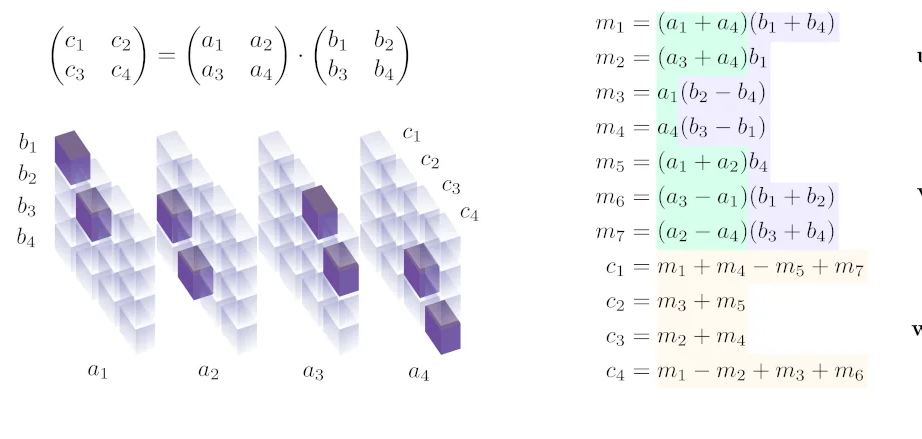

**Quelle**: Fawzi, A. et al. Discovering faster matrix multiplication algorithms with reinforcement learning. Nature 610 (2022)

In [4]:
def strassen2x2(A,B):
    """ 
    Strassen Algorithm for 2x2 Matrices, i.e. the shape of A and B is (2,2)
    Returns the matrix product C=A*B computed with strassen algorithm
    """
    m1=(A[0,0]+A[1,1])*(B[0,0]+B[1,1])
    m2=(A[1,0]+A[1,1])*(B[0,0])
    m3=A[0,0]*(B[0,1]-B[1,1])
    m4=A[1,1]*(B[1,0]-B[0,0])
    m5=(A[0,0]+A[0,1])*B[1,1]
    m6=(A[1,0]-A[0,0])*(B[0,0]+B[0,1])
    m7=(A[0,1]-A[1,1])*(B[1,0]+B[1,1])

    C=np.array([[m1+m4-m5+m7,m3+m5],[m2+m4,m1-m2+m3+m6]])
    
    
    return C

**Teste deine Funktion: (Code nicht verändern!!)**

In [5]:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])


if np.all(strassen2x2(B,A) == np.array([[23,34],[31,46]])):
    
    print("Success")
    
else:
    print("Try again")

Success


# Schritt 3 Implementierung des Strassen Algorithmus für Blockmatrizen


Der Strassen Algorithmus kann nicht nur für $2\times 2$ Matrizen genutzt werden, sondern auch für allgemeine quadratische Matrizen mit einer geraden Anzahl an Spalten und Zeilen.


Dabei gehen Sie analog zum $2\times 2$ Fall vor.

Zunächst teilen Sie die Matrizen $A$ und $B$ in Blockmatrizen auf:
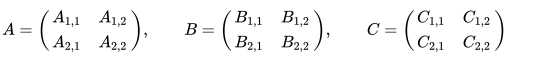

Danach berechnen Sie die Matrizen $M_i$ als Zwischenergebnis:
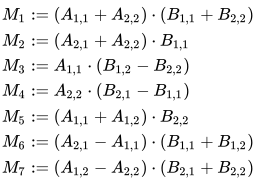

Schlussendlich erhalten Sie das Ergebnis der Matrix C mittels der Blöcke:

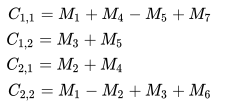

Implementieren Sie daher zunächst eine Funktion die aus einer quadratischen Matrix mit gerade Anzahl an Spalten/Zeilen, die entsprechenden Blockmatrizen bestimmt. Dabei haben die einzelnen Blöcke dann $n/2$ Spalten/Zeilen

In [6]:
def splitmatrix(A):
    """
    Given an even length matrix, returns the top_left, top_right, bot_left, bot_right
    quadrant.

    """
    
    n,m=A.shape
    
    if n!=m:
        raise Exception("Only square matrices are supported!")
    
    
    
    if  n % 2 != 0 or m % 2 != 0:
        raise Exception("Odd matrices are not supported!")
        
        
    top_left=A[0:(n//2),0:(n//2)]
    top_right=A[0:n//2,n//2:n]
    bot_left=A[(n//2):n,0:(n//2)]
    bot_right=A[n//2:n,n//2:n]
    
     
    return top_left, top_right, bot_left, bot_right

**Teste deine Funktion: (Code nicht verändern!!)**

In [7]:
A,B,C,D=splitmatrix(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]))

if np.all(A==np.array([[1,2],[5,6]])) and np.all(C==np.array([[9,10],[13,14]])):
    print("Succes")
    
else:
    print("Try Again")

Succes



Implementieren Sie nun den Strassenalgorithmus für Blockmatrizen. Nutzen Sie für die Multiplikation der Matrizen, zur Berechnung der $M_i$ die Funktion *matrix_times_matrix*

In [8]:
def strassen2n(A,B):
    """
    Calculate the product of two matrices, using the Strassen
    Algorithm for Block Matrices.  It only supports even length matrices.
    """
    n=A.shape[0]
    k=B.shape[0]
    
    
    
    
    A11, A12, A21, A22 = splitmatrix(A)
    B11, B12, B21, B22 = splitmatrix(B)
    
    
    
 
    M1 = matrix_times_matrix(A11+A22, B11+B22)
    M2 = matrix_times_matrix(A21+A22,B11)
    M3 = matrix_times_matrix(A11,B12-B22)
    M4 = matrix_times_matrix(A22,B21-B11)
    M5 = matrix_times_matrix(A11+A12,B22)
    M6 = matrix_times_matrix(A21-A11,B11+B12)
    M7 = matrix_times_matrix(A12-A22,B21+B22)
 


    C=np.zeros((n,n))
    
    C[0:n//2,0:n//2]=M1+M4-M5+M7
    C[0:n//2,n//2:n]=M3+M5
    C[n//2:n,0:n//2]=M2+M4
    C[n//2:n,n//2:n]=M1-M2+M3+M6
    
    return C

**Teste deine Funktion: (Code nicht verändern!!)**

In [9]:
A=np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
B=np.array([[5,6,7,8],[5,6,7,8],[5,6,7,8],[5,6,7,8]])


if np.all(strassen2n(B,A) == np.array([[26,52,78,104],[26,52,78,104],[26,52,78,104],[26,52,78,104]])):
    
    print("Success")
    
else:
    print("Try again")

Success


## Schritt 4: Rekursiver Strassenalgorithmus für $2^n\times 2^n$ Matrizen

Im nächsten Schritt gehen wir nun davon aus, dass $A$ und $B$ zwei Matrizen mit $2^n$ Spalten und Zeilen sind.

In diesem Fall können wir den Strassenalgorithmus rekursiv auch für die Berechnung der Zwischenergebnisse $M_i$ anwenden. Wir wollen im Folgenden also den Strassenalgorithmus rekursiv berechnen.

In [10]:
def strassen2n_recursive(A,B):
    """
    Recursive function to calculate the product of two matrices, using the Strassen
    Algorithm.  It only supports even length matrices.
    """
    n=A.shape[0]
    k=B.shape[0]
        
    if n==1 and k==1:
        return A*B
    A11, A12, A21, A22 = splitmatrix(A)
    B11, B12, B21, B22 = splitmatrix(B)
    
    
 
    M1 = strassen2n(A11+A22, B11+B22)
    M2 = strassen2n(A21+A22,B11)
    M3 = strassen2n(A11,B12-B22)
    M4 = strassen2n(A22,B21-B11)
    M5 = strassen2n(A11+A12,B22)
    M6 = strassen2n(A21-A11,B11+B12)
    M7 = strassen2n(A12-A22,B21+B22)
 


    C=np.zeros((n,n))
    
    C[0:n//2,0:n//2]=M1+M4-M5+M7
    C[0:n//2,n//2:n]=M3+M5
    C[n//2:n,0:n//2]=M2+M4
    C[n//2:n,n//2:n]=M1-M2+M3+M6
    
    return C
    

**Teste deine Funktion: (Code nicht verändern!!)**

In [11]:
A=np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
B=np.array([[5,6,7,8],[5,6,7,8],[5,6,7,8],[5,6,7,8]])


if np.all(strassen2n_recursive(B,A) == np.array([[26,52,78,104],[26,52,78,104],[26,52,78,104],[26,52,78,104]])):
    
    print("Success")
    
else:
    print("Try again")


Success


# Schritt 5 Implementierung des Strassen Algorithmus mit einer allgemeinen Matrix


Wir können nun wie folgt den allgemeinen Fall auf den Fall von zwei Quadratischen Matrizen mit $2^n$ Spalten/Zeilen zurückführen:

1) Finde die kleinste Zahl $n\in \mathbb{N}$, so dass $2^n$ größer gleich der maximalen Spalten/Zeilen- Anzahl von $A$ und $B$ ist.

2) Mache aus $A$ und $B$ eine $2^n\times 2^n$ Matrix in demm du den Rest mit $0$en auffüllst.

3) Führe den rekursiven Strassenalgorithmus für $2^n\times 2^n$-Matrizen durch.

4) Transformiere das Endergebnis wieder in die Richtige Größe und entferne die $0$en

Schreibe eine Funktion die aus einer Matrix $A$ eine quadratische Matrix der Länge $n$ macht in dem du $0$en hinzufügst. (Vgl 1))

In [12]:
def pad(A,n):
    
    """
    adds zeros to the matrix A such that it will be transformed into a nxn Matrix
    """
    B=np.zeros((n,n))
    
    n,m=A.shape
    
    B[0:n,0:m]=A
    
    
    return B
    
    
    

Schreibe nun eine Funktion die aus einer Matrix $A$ eine verkleinerte Matrix mit $n$ Zeilen und $m$ Spalten macht.(Vgl. 4))

In [13]:
def depad(A,n,m):

    return A[0:n,0:m]

Füge nun alles zusammen und führe die Schritte 1) bis 4) in einer Funktion aus

In [14]:
def strassenforall(A,B):
    """
    Computes the product of the Matrices by executing Step 1 to Step 4
    
    """
    
    r,s=A.shape
    k,l=B.shape
    
    if s!=k:
        raise Exception("Shapes do not fit together")
    
    
    t=max([r,s,k,l])
    
    n =int(math.pow(2, math.ceil(math.log2(t)))) # This is the n we are looking for. 
    
    A=pad(A,r)
    B=pad(B,r)
    
    C=strassen2n(A,B)
    
    C=depad(C,n,l)
    
    return C

**Teste deine Funktion: (Code nicht verändern!!)**

In [15]:
A = np.array([
        [2, 3, 4, 5],
        [6, 4, 3, 1],
        [2, 3, 6, 7],
        [3, 1, 2, 4],
        [2, 3, 4, 5],
        [6, 4, 3, 1],
        [2, 3, 6, 7],
        [3, 1, 2, 4],
        [2, 3, 4, 5],
        [6, 2, 3, 1]
    ])
B = np.array([[0, 2, 1, 1], [16, 2, 3, 3], [2, 2, 7, 7], [13, 11, 22, 4]])
result = np.array([[121,  73, 149,  59]
     ,[ 83,  37,  61,  43]
     ,[151,  99, 207,  81]
     ,[ 72,  56, 108,  36]
     ,[121,  73, 149,  59]
     ,[ 83,  37,  61,  43]
     ,[151,  99, 207,  81]
     ,[ 72,  56, 108,  36]
     ,[121,  73, 149,  59]
     ,[ 51,  33,  55,  37]])

if np.all(strassenforall(A,B)==result):
    print("Herzlichen Glückwunsch Sie haben erfolgreich das Experiment absolviert!")
else:
    print("Try again")


Herzlichen Glückwunsch Sie haben erfolgreich das Experiment absolviert!


None
